### MonteCarlo simulations for the safety factor of a foundation.

Using montecarlo simulations and the safety factor calculation of a foundation, up to 10,000 simulations are performed to estimate the safety factor.

Input number of cicles or 0:10


Input number of cicles or 0:100


Input number of cicles or 0:500


Input number of cicles or 0:1000


Input number of cicles or 0:10000


Input number of cicles or 0:0


Enter L value:1.5


FS Montecarlo Simulation:


0    1.524824
dtype: float64

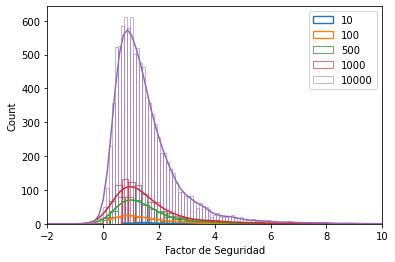

In [52]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

ciclos = list()
dictyFS = dict()

while True:
    ciclo = int(input("Input number of cicles or 0:"))
    print("\n")
    if ciclo == 0:
        break
    else:
        ciclos.append(ciclo)   
    
L = float(input("Enter L value:"))
print("\n")

#COSTANTES
Sgamma = 0.9
Df = 0.5
B = 0.5 
HB = 0
HL = 500
V = 1100
k = 1
Dc = 1+0.4*k
Dgamma = 1
qadm = 100


def montecarlo():
    for ciclo in ciclos:
        c = np.zeros(ciclo)
        phi = np.zeros(ciclo)
        gamma = np.zeros(ciclo)

        Nq = np.zeros(ciclo)
        Nc = np.zeros(ciclo)
        Ngamma = np.zeros(ciclo)

        Sc = np.zeros(ciclo)
        Sq = np.zeros(ciclo)

        Iq = np.zeros(ciclo)
        Igamma = np.zeros(ciclo)
        Ic = np.zeros(ciclo)

        Dq = np.zeros(ciclo)
        q = np.zeros(ciclo)
        qult = np.zeros(ciclo)
        
        FS = np.zeros(ciclo)
        m = (2+(L/B))/(1+(L/B))


        for i in range(1,ciclo+1):
            c[i-1] = 5.23 + 2.09*np.random.randn()
            phi[i-1] = np.deg2rad(22.54) + np.deg2rad(6.16)*np.random.randn()
            gamma[i-1] = 19.17 + 0.9184*np.random.randn()
            Nq[i-1] = np.exp(1)**(np.pi*np.tan(phi[i-1]))*(np.tan(np.deg2rad(45)+(phi[i-1]/2)))**2
            Nc[i-1] = (Nq[i-1]-1)*1/(np.tan(phi[i-1]))
            Ngamma[i-1] = 2*(Nq[i-1]+1)*np.tan(phi[i-1])
            Sc[i-1] = 1+(Nq[i-1]/Nc[i-1])*(B/L)
            Sq[i-1] = 1+(B/L)*np.tan(phi[i-1]);
            Iq[i-1] = (1-(HL/(V+B*L*0.6*c[i-1]*(1/np.tan(phi[i-1])))))**m
            Igamma[i-1] = (1-(HL/(V+0.6*c[i-1]*(1/np.tan(phi[i-1])))))**(m+1)
            Ic[i-1] = Iq[i-1]-((1-Iq[i-1])/(Nq[i-1]-1))
            Dq[i-1] = 1+(2*np.tan(phi[i-1]))*(((1-np.sin(phi[i-1]))**2)*k);
            q[i-1]= gamma[i-1]*Df;
            qult[i-1] = (c[i-1]*Nc[i-1]*Sc[i-1]*Dc*Ic[i-1])+(q[i-1]*Nq[i-1]*Sq[i-1]*Dq[i-1]*Iq[i-1])+(0.5*gamma[i-1]*B*Ngamma[i-1]*Sgamma*Igamma[i-1]);
            FS[i-1] = qult[i-1]/qadm;
            pFS = FS/ciclo
            dictyFS[ciclo]=FS.tolist()

    for key in dictyFS:
        plt.xlim(-2, 10)
        ax = sns.histplot(dictyFS[key],label=key,kde=True, fill=False)
        ax.set_xlabel("Factor de Seguridad")
        plt.legend()
    
    frame = pd.DataFrame.from_dict(dictyFS[10000])
    print("FS Montecarlo Simulation:")
    return frame.mean()

montecarlo()

### Pi value MonteCarlo Simulations.

* Generate two uniform random numbers x and y between 0 and 1 in total 1000 times.
* Calculate $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* calculate the total number of times they are inside the circle and divide it by the total number of attempts to obtain an approximation of the probability of falling inside the circle.
* use this probability to approximate the value of π.
* repeat the experiment a sufficient number of times (e.g. 100), to obtain (100) different approximations of π. 
* calculate the average of the previous 100 experiments to give a final value of π.


3.1421679999999994


(3.1421679999999994, [<matplotlib.lines.Line2D at 0x7ffd253bc970>])

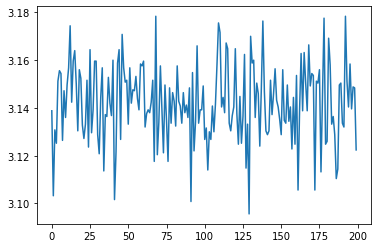

In [53]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)


pi_montecarlo(10000, 200)